In [25]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
from torchvision.utils import make_grid

import utils
import matplotlib.pyplot as plt

In [26]:
# define writer for tensorboard
writer = SummaryWriter()

In [27]:
# Define the mini-batch size
batch_size = 10

# Download the dataset and create the dataloaders
cifar_data = datasets.CIFAR10("./", train=True, download=True, transform=transforms.ToTensor())

train_size = int(0.8 * len(cifar_data))
val_size = len(cifar_data)-train_size

cifar_train, cifar_val = torch.utils.data.random_split(cifar_data, [train_size, val_size])

train_loader = DataLoader(cifar_train, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(cifar_val, batch_size=batch_size, shuffle=False)

cifar_test = datasets.CIFAR10("./", train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(cifar_test, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


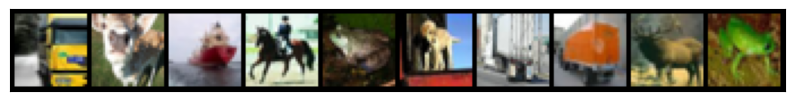

In [28]:
# plot the first 10 images
for images,lables in train_loader: 
    fig, ax = plt.subplots(figsize = (10,10))
    ax.set_xticks([])
    ax.set_yticks([])
    grid = make_grid(images[:10],10)
    ax.imshow(grid.permute(1,2,0))
    writer.add_image('image', grid, 0)
    break

In [29]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(1600, 120)
        self.fc2 = nn.Linear(120, 10)
        self.af = nn.Tanh()

    def forward(self, x):
        # Implement the forward function in the network
        x = self.conv1(x)
        x = self.af(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.af(x)
        x = x.flatten(1)
        x = self.fc1(x)
        x = self.af(x)
        x = self.fc2(x)
        return x

Epoch 0, training loss: 0.18217328134179114, validation loss: 0.16824072672724724
Train accuracy = 0.354525
Validation accuracy = 0.4028


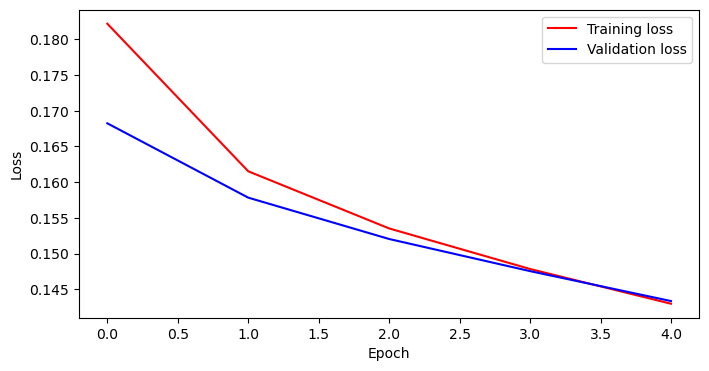

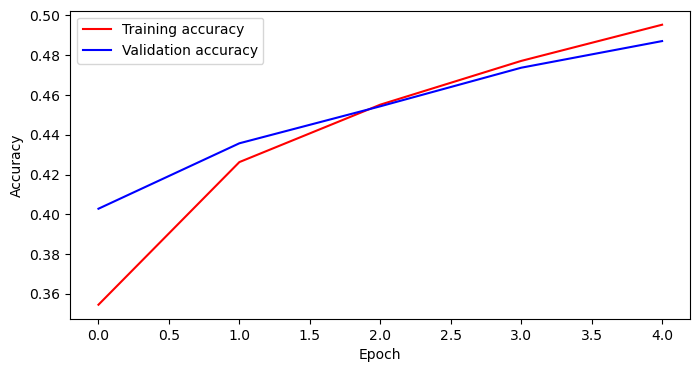

lowest loss for validation set: 0.14337606192231178, with an accuracy of 0.4871


In [30]:
# Hyperparams
LEARNING_RATE = 0.0001
epochs = 5

# Load our network
model = Net()

# Define our loss function
criterion = nn.CrossEntropyLoss()

# Define our optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Train the model
utils.train_model(model, criterion, optimizer, train_loader, val_loader, "best_model_tanh.pt", writer, epochs)

Test accuracy is 49.0%.


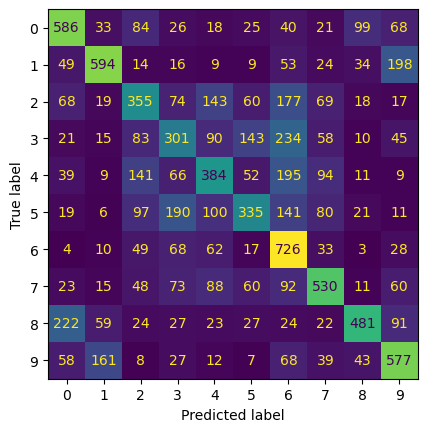

In [31]:
# Test the model
best_model = Net()
best_model = torch.load('best_model_tanh.pt')

utils.test_model(best_model, test_loader)